## Introduction



Poverty thresholds are the dollar amounts used to determine poverty status and often the statistical basis in federal work and analysis.The Census Bureau assigns each person or family one out of 48 possible poverty thresholds.

Thresholds vary by the size of the family and age of the members.
The same thresholds are used throughout the United States (they do not vary geographically).
Thresholds are updated annually for inflation using the Consumer Price Index for All Urban Consumers (CPI-U).

- 12,752 for one person with no children in the household under 65
- 11,756 for one person with no children in the household over 65


A single person with a threhold of  501, the highest threshold, makes at least $63,887

Poverty status cannot be determined for people in:

- Institutional group quarters (such as prisons or nursing homes)
- College dormitories
- Military barracks
- Living situations without conventional housing (and who are not in shelters)

 In this project, I develop an algorithm to classify the poverty threshold of an individual. To accomplish this task, I use a data from the 2017 American Community Survey with the  dataset obtained from IPUMS USA (IPUMS USA, University of Minnesota, www.ipums.org) a service that collects, preserves, and harmonizes U.S. census microdata. The dataset that I had selected contains  contains 148,594 rows and 31 variables.  The variables surround educational attainment, race, health care coverage type, food stamp recipiency, metropolitan type, income, rent paid, and ownership type. The 'lowerpov' variable that I create is my desired target variable and it takes value 2 in case of a poverty threshold greater than 200, and a value of 1 otherwise.  In this project, I aim to look for the traits that are most indicative of whether or not an individual will be have a poverty threshold above equal to or below 200 in addition to testing several different supervised learning models for the most accurate detection including: 
- Native Bayes Classifier
- Knn classifier
- Random Forest
- Decision tree 
- Logistic regression 
- Svm classifier 
- Gradient boosted classifier 

I use gridsearch cv to find the ideal parameters for each of the classifiers I use. I also use a  number of different metrics to evaluate the performance of each of the models. The AUC and ROC plots reveal the positive to false positive rate and helps visually compare the effectiveness of the classifier. I use holdout grouping, cross-validation, and run classification reports on each of the models. 


### Exploration

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [25]:
census = pd.read_csv('usa_00008.csv')
print(census.columns)
print(census.dtypes)

Index(['YEAR', 'DATANUM', 'SERIAL', 'CBSERIAL', 'HHWT', 'METRO', 'GQ',
       'OWNERSHP', 'OWNERSHPD', 'RENTGRS', 'FOODSTMP', 'PERNUM', 'PERWT',
       'SEX', 'AGE', 'HISPAN', 'HISPAND', 'RACAMIND', 'RACASIAN', 'RACBLK',
       'RACPACIS', 'RACWHT', 'RACOTHER', 'HCOVANY', 'HCOVPRIV', 'HCOVPUB',
       'EDUC', 'EDUCD', 'INCTOT', 'INCWAGE', 'POVERTY'],
      dtype='object')
YEAR         int64
DATANUM      int64
SERIAL       int64
CBSERIAL     int64
HHWT         int64
METRO        int64
GQ           int64
OWNERSHP     int64
OWNERSHPD    int64
RENTGRS      int64
FOODSTMP     int64
PERNUM       int64
PERWT        int64
SEX          int64
AGE          int64
HISPAN       int64
HISPAND      int64
RACAMIND     int64
RACASIAN     int64
RACBLK       int64
RACPACIS     int64
RACWHT       int64
RACOTHER     int64
HCOVANY      int64
HCOVPRIV     int64
HCOVPUB      int64
EDUC         int64
EDUCD        int64
INCTOT       int64
INCWAGE      int64
POVERTY      int64
dtype: object


In [3]:
census.describe()

,YEAR,DATANUM,SERIAL,CBSERIAL,HHWT,METRO,GQ,OWNERSHP,OWNERSHPD,RENTGRS,...,RACWHT,RACOTHER,HCOVANY,HCOVPRIV,HCOVPUB,EDUC,EDUCD,INCTOT,INCWAGE,POVERTY
count,148594.0,148594.0,1.485940e+05,1.485940e+05,148594.000000,148594.000000,148594.000000,148594.0,148594.000000,148594.000000,...,148594.000000,148594.000000,148594.000000,148594.000000,148594.000000,148594.000000,148594.000000,1.485940e+05,148594.000000,148594.000000
mean,2017.0,1.0,6.664452e+05,2.017001e+12,113.491063,2.280906,1.005296,2.0,21.936646,1181.205244,...,1.677309,1.066046,1.878306,1.591013,1.396638,7.388979,76.264728,3.432101e+04,27357.299756,262.870049
std,0.0,0.0,3.759372e+05,4.007110e+05,86.630697,0.751211,0.116560,0.0,0.243599,731.308399,...,0.467507,0.248363,0.326933,0.491648,0.489201,1.774405,16.689256,4.264976e+04,40619.894012,161.580377
min,2017.0,1.0,3.800000e+01,2.017000e+12,2.000000,1.000000,1.000000,2.0,21.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,61.000000,-8.800000e+03,0.000000,1.000000
25%,2017.0,1.0,3.341818e+05,2.017000e+12,59.000000,2.000000,1.000000,2.0,22.000000,710.000000,...,1.000000,1.000000,2.000000,1.000000,1.000000,6.000000,63.000000,1.040000e+04,0.000000,124.000000
50%,2017.0,1.0,7.096650e+05,2.017001e+12,88.000000,2.000000,1.000000,2.0,22.000000,1077.000000,...,2.000000,1.000000,2.000000,2.000000,1.000000,6.000000,65.000000,2.470000e+04,17500.000000,238.000000
75%,2017.0,1.0,9.256762e+05,2.017001e+12,141.000000,3.000000,1.000000,2.0,22.000000,1560.000000,...,2.000000,1.000000,2.000000,2.000000,2.000000,10.000000,101.000000,4.500000e+04,40000.000000,412.000000
max,2017.0,1.0,1.394210e+06,2.017001e+12,1260.000000,3.000000,5.000000,2.0,22.000000,4647.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,10.000000,101.000000,1.049000e+06,736000.000000,501.000000


In [4]:
census[census['POVERTY']>200].describe()


,YEAR,DATANUM,SERIAL,CBSERIAL,HHWT,METRO,GQ,OWNERSHP,OWNERSHPD,RENTGRS,...,RACWHT,RACOTHER,HCOVANY,HCOVPRIV,HCOVPUB,EDUC,EDUCD,INCTOT,INCWAGE,POVERTY
count,85840.0,85840.0,8.584000e+04,8.584000e+04,85840.000000,85840.000000,85840.000000,85840.0,85840.000000,85840.000000,...,85840.000000,85840.000000,85840.000000,85840.000000,85840.000000,85840.000000,85840.000000,8.584000e+04,85840.000000,85840.000000
mean,2017.0,1.0,6.614249e+05,2.017001e+12,113.390797,2.356838,1.003157,2.0,21.944769,1362.252912,...,1.707945,1.059623,1.908003,1.771493,1.241822,7.785788,80.020946,5.000671e+04,41605.561859,377.834471
std,0.0,0.0,3.796580e+05,4.002565e+05,85.940865,0.715551,0.084032,0.0,0.228431,763.256646,...,0.454710,0.236788,0.289023,0.419873,0.428190,1.856102,17.459936,4.990277e+04,47806.529135,106.982353
min,2017.0,1.0,1.300000e+02,2.017000e+12,3.000000,1.000000,1.000000,2.0,21.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,61.000000,-8.800000e+03,0.000000,201.000000
25%,2017.0,1.0,3.160610e+05,2.017000e+12,60.000000,2.000000,1.000000,2.0,22.000000,875.000000,...,1.000000,1.000000,2.000000,2.000000,1.000000,6.000000,63.000000,2.610000e+04,9000.000000,277.000000
50%,2017.0,1.0,7.104640e+05,2.017001e+12,88.000000,2.000000,1.000000,2.0,22.000000,1250.000000,...,2.000000,1.000000,2.000000,2.000000,1.000000,8.000000,81.000000,4.000000e+04,35000.000000,379.000000
75%,2017.0,1.0,8.922768e+05,2.017001e+12,139.000000,3.000000,1.000000,2.0,22.000000,1750.000000,...,2.000000,1.000000,2.000000,2.000000,1.000000,10.000000,101.000000,6.000000e+04,56000.000000,501.000000
max,2017.0,1.0,1.394168e+06,2.017001e+12,1260.000000,3.000000,5.000000,2.0,22.000000,4647.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,10.000000,101.000000,1.049000e+06,736000.000000,501.000000


In [5]:
census[census['POVERTY']<=200].describe()


,YEAR,DATANUM,SERIAL,CBSERIAL,HHWT,METRO,GQ,OWNERSHP,OWNERSHPD,RENTGRS,...,RACWHT,RACOTHER,HCOVANY,HCOVPRIV,HCOVPUB,EDUC,EDUCD,INCTOT,INCWAGE,POVERTY
count,62754.0,62754.0,6.275400e+04,6.275400e+04,62754.000000,62754.000000,62754.000000,62754.0,62754.000000,62754.000000,...,62754.000000,62754.000000,62754.000000,62754.000000,62754.000000,62754.000000,62754.000000,62754.000000,62754.000000,62754.000000
mean,2017.0,1.0,6.733124e+05,2.017001e+12,113.628215,2.177041,1.008223,2.0,21.925535,933.553590,...,1.635402,1.074832,1.837684,1.344137,1.608407,6.846193,71.126669,12864.837014,7867.373713,105.612407
std,0.0,0.0,3.706800e+05,4.013185e+05,87.566005,0.785620,0.149990,0.0,0.262529,602.773464,...,0.481321,0.263122,0.368744,0.475090,0.488110,1.494269,14.029806,10190.967871,11097.773182,57.933312
min,2017.0,1.0,3.800000e+01,2.017000e+12,2.000000,1.000000,1.000000,2.0,21.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,61.000000,-8100.000000,0.000000,1.000000
25%,2017.0,1.0,3.644255e+05,2.017000e+12,57.000000,2.000000,1.000000,2.0,22.000000,540.000000,...,1.000000,1.000000,2.000000,1.000000,1.000000,6.000000,63.000000,4800.000000,0.000000,66.000000
50%,2017.0,1.0,7.090810e+05,2.017001e+12,88.000000,2.000000,1.000000,2.0,22.000000,870.000000,...,2.000000,1.000000,2.000000,1.000000,2.000000,6.000000,63.000000,12000.000000,0.000000,109.000000
75%,2017.0,1.0,9.547802e+05,2.017001e+12,144.000000,3.000000,1.000000,2.0,22.000000,1260.000000,...,2.000000,1.000000,2.000000,2.000000,2.000000,8.000000,81.000000,19700.000000,15000.000000,154.000000
max,2017.0,1.0,1.394210e+06,2.017001e+12,1162.000000,3.000000,5.000000,2.0,22.000000,4311.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,10.000000,101.000000,88000.000000,88000.000000,200.000000


## Visualization

### Who is represented in the data? 

(array([26919.,     0.,     0.,     0.,     0., 53015.,     0.,     0.,
            0., 68660.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

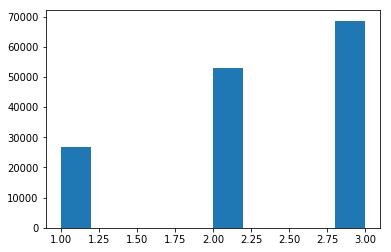

In [4]:
plt.hist(census['METRO'])

METRO indicates whether the household resided within a metropolitan area and, for households in metropolitan areas, whether the household resided within or outside of a central/principal city. A value of 1 is not in a metro area, a value of 2 is in a metro or principal city, and a value of 3 is a metro area outside of the principal city. This dataset has a greater amount of the population in metro areas and less representation of non metro or rural areas. 

(array([68386.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 80208.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

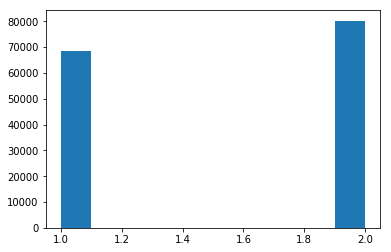

In [5]:
plt.hist(census['SEX'])

SEX refers to the sex of the individual, where a value of 2 is female and a value of 1 is male. This split slightly overamples females, while ideally they would be equally split.

(array([     0.,      0.,      0.,      0.,      0., 148594.,      0.,
             0.,      0.,      0.]),
 array([1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5]),
 <a list of 10 Patch objects>)

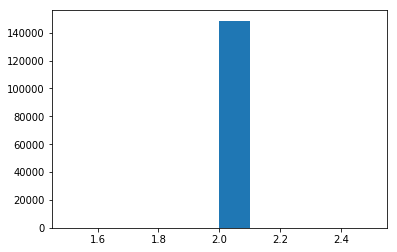

In [6]:
plt.hist(census['OWNERSHP'])

I specifically choose this value to make sure that everyone in this dataset was renting. I wanted to speicifically look at renters because that is the most common case and a trend that will continue. 

(array([34931., 25114., 19823., 18523., 17707., 13266.,  8658.,  5183.,
         3452.,  1937.]),
 array([26., 33., 40., 47., 54., 61., 68., 75., 82., 89., 96.]),
 <a list of 10 Patch objects>)

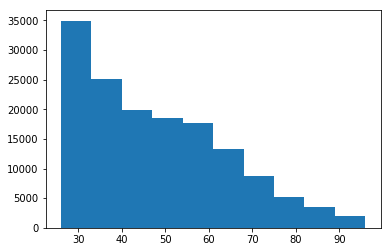

In [7]:
plt.hist(census['AGE'])

The age starts at 26, an age I choose because this is when you are no longer on a parents health care plan and more responsible for your self as an individual.

### Examining Poverty 

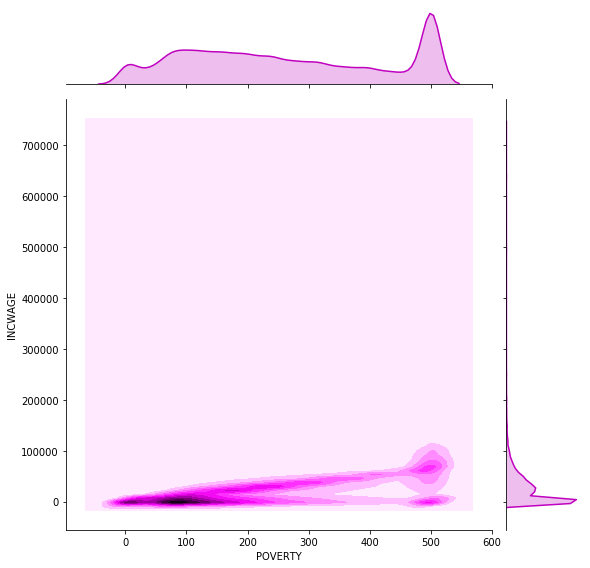

In [8]:
g = sns.jointplot("POVERTY", "INCWAGE", data=census, kind="kde",
                  color="m", height=8)


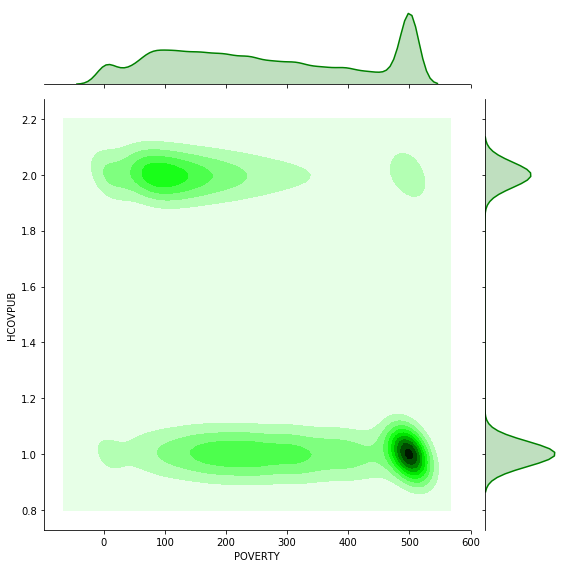

In [9]:
g = sns.jointplot("POVERTY", "HCOVPUB", data=census, kind="kde",
                  color="g", height=8)

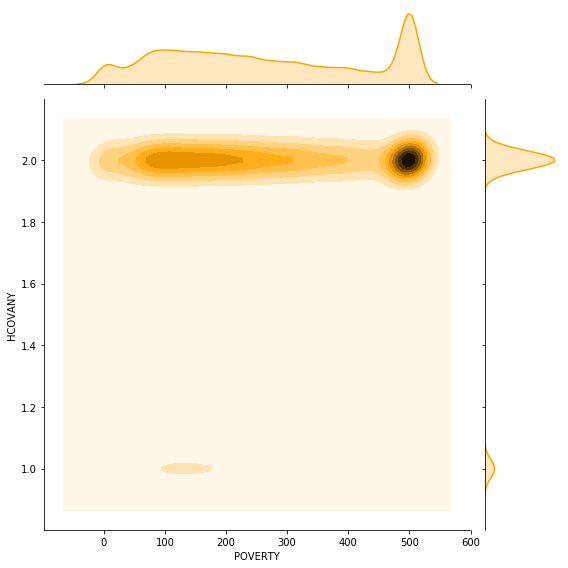

In [26]:
g = sns.jointplot("POVERTY", "HCOVANY", data=census, kind="kde",
                  color="orange", height=8)

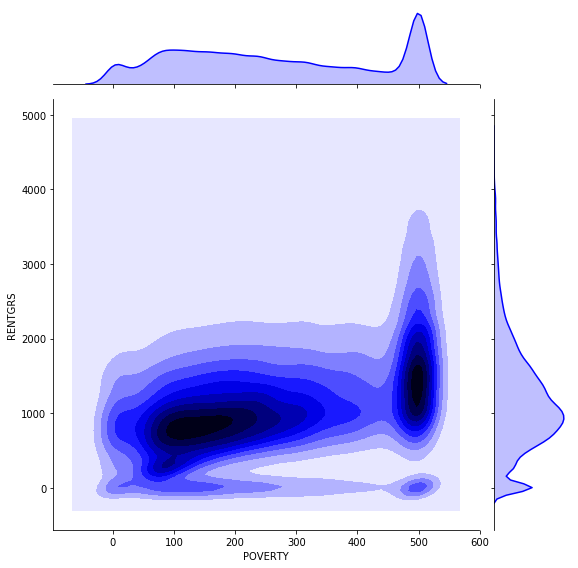

In [11]:
g = sns.jointplot("POVERTY", "RENTGRS", data=census, kind="kde",
                  color="b", height=8)

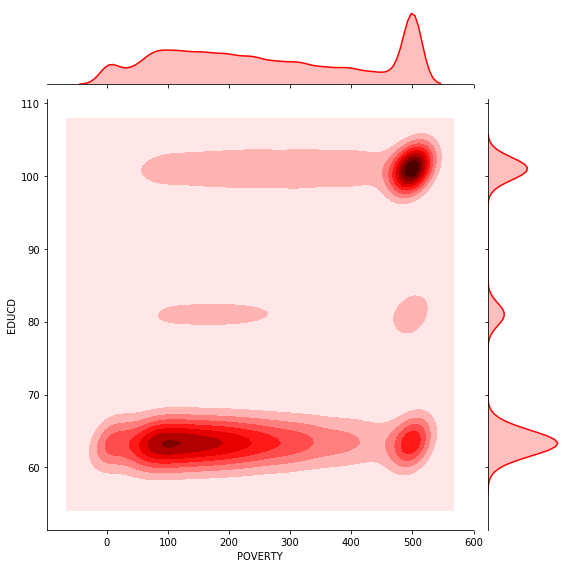

In [12]:
g = sns.jointplot("POVERTY", "EDUCD", data=census, kind="kde",
                  color="r", height=8)

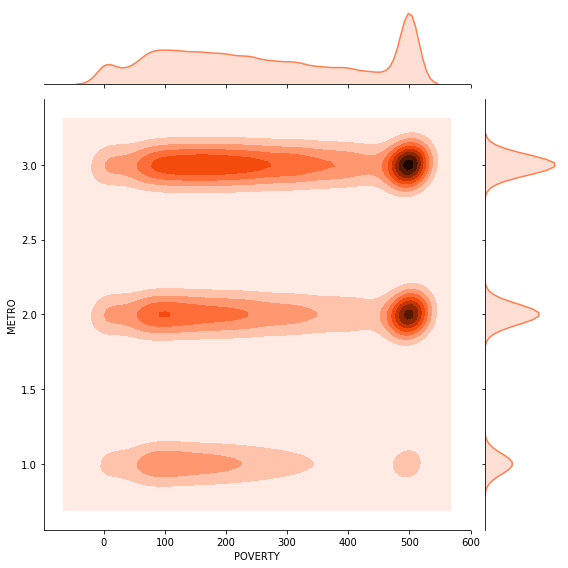

In [27]:
g = sns.jointplot("POVERTY", "METRO", data=census, kind="kde",
                  color="coral", height=8)

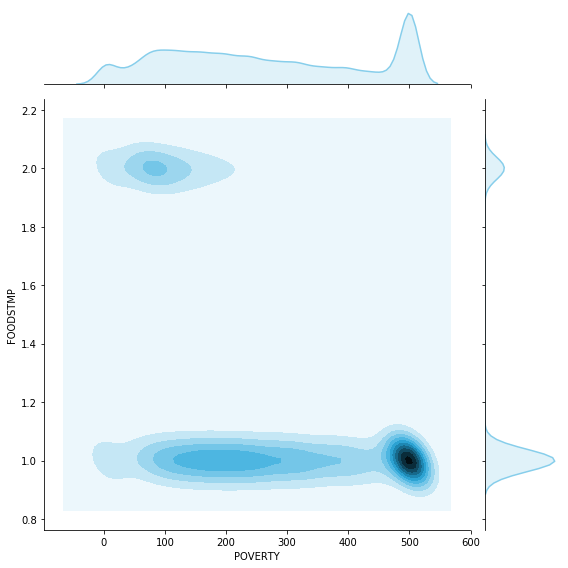

In [13]:
g = sns.jointplot("POVERTY", "FOODSTMP", data=census, kind="kde",
                  color="skyblue", height=8)

Text(0.5, 1.0, 'Class Distributions')

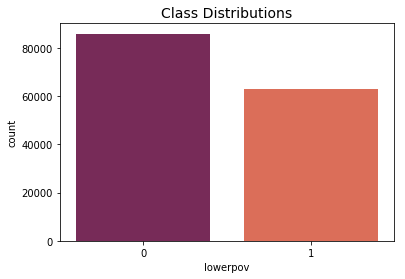

In [3]:
census['lowerpov'] = census['POVERTY'].apply(lambda x: 1 if x <= 200 else 0)

sns.countplot('lowerpov',palette="rocket", data=census)

plt.title('Class Distributions', fontsize=14)

# Feature Engineering 

Rather than use values like income and how much the individual pays in rent, I wanted to create a feature that examines the relationship between the two variables in addition to other characteristics. 

(array([1.41173e+05, 6.33100e+03, 5.67000e+02, 2.02000e+02, 1.93000e+02,
        4.20000e+01, 7.40000e+01, 9.00000e+00, 0.00000e+00, 3.00000e+00]),
 array([ -1.0268 ,   9.55788,  20.14256,  30.72724,  41.31192,  51.8966 ,
         62.48128,  73.06596,  83.65064,  94.23532, 104.82   ]),
 <a list of 10 Patch objects>)

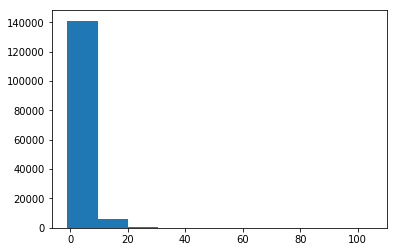

In [5]:
#Adding one to prevent impossible values 
#census['rent_ratio'] = ((census['RENTGRS']+.1)/(census['INCTOT'] +.1))/1000
census['income_vs_rent'] = ((census['INCTOT'] +.1)-(census['RENTGRS']+.1))/10000

plt.hist(census['income_vs_rent'])

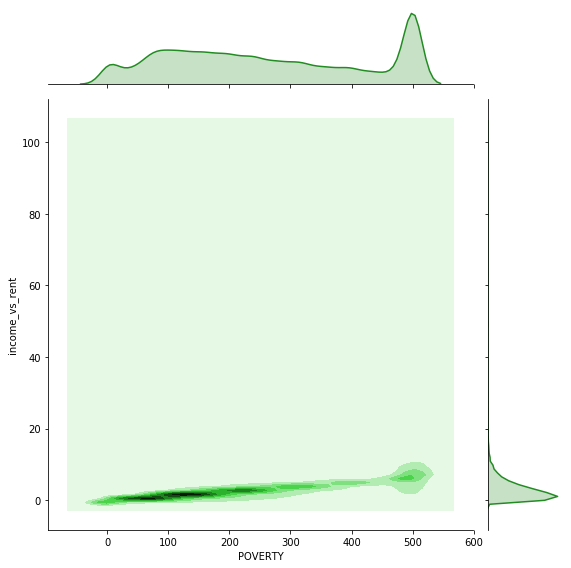

In [6]:
g = sns.jointplot("POVERTY", "income_vs_rent", data=census, kind="kde",
                  color="forestgreen", height=8)

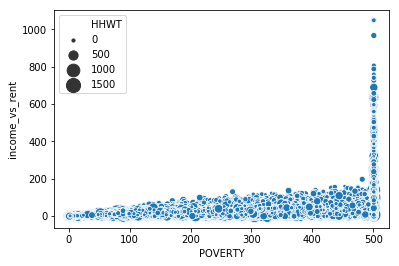

In [17]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="POVERTY", y="income_vs_rent",size="HHWT",
                     palette=cmap, sizes=(10, 200),
                     data=census)

In [7]:
# Getting rid of unecessary variables 
census = census.drop(['DATANUM'],1)
census = census.drop(['YEAR'],1)
census = census.drop(['CBSERIAL'],1)
census = census.drop(['OWNERSHP'],1)
census = census.drop(['PERNUM'],1)
census = census.drop(['SERIAL'],1)

In [19]:
census['lowerpov'] = census['POVERTY'].apply(lambda x: 1 if x <= 200 else 0)


In [8]:
census = census.drop(['POVERTY'],1)
census = census.drop(['INCTOT'],1)
census = census.drop(['INCWAGE'],1)

In [9]:
census = census.drop(['RENTGRS'],1)

                    HHWT     METRO        GQ  OWNERSHPD  FOODSTMP     PERWT  \
HHWT            1.000000  0.105367 -0.007548   0.078268 -0.003862  0.921658   
METRO           0.105367  1.000000 -0.022294   0.109977 -0.087602  0.103950   
GQ             -0.007548 -0.022294  1.000000  -0.007381 -0.003000 -0.000530   
OWNERSHPD       0.078268  0.109977 -0.007381   1.000000  0.028570  0.076926   
FOODSTMP       -0.003862 -0.087602 -0.003000   0.028570  1.000000  0.008365   
PERWT           0.921658  0.103950 -0.000530   0.076926  0.008365  1.000000   
SEX            -0.011365  0.004153 -0.000904   0.006290  0.071054 -0.029467   
AGE            -0.078023  0.001464  0.033364  -0.111640  0.019386 -0.098204   
HISPAN          0.073928  0.098109 -0.005342   0.052474  0.040169  0.089274   
HISPAND         0.073193  0.094392 -0.005340   0.051063  0.040083  0.088286   
RACAMIND       -0.037649 -0.079297 -0.004600  -0.032360  0.042678 -0.035457   
RACASIAN       -0.009579  0.039643 -0.000649   0.019

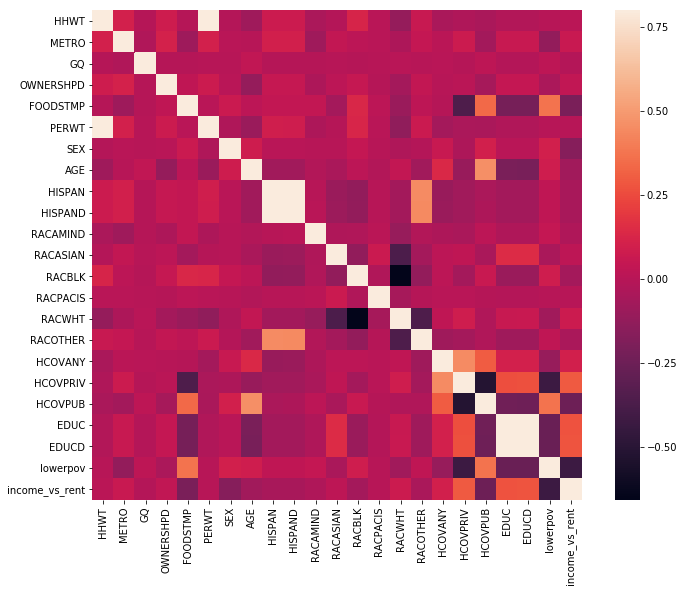

In [23]:
# Make the correlation matrix.
corrmat = census.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

### Preparing to model: Selecting Features and PCA

In [10]:
# selectKbest 
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif

y = census['lowerpov']
X = census.drop(['lowerpov'],1)


# Perform feature selection
selector = SelectKBest(f_classif, k=12)
selector.fit(X,y)

X_new = selector.transform(X)
X_new.shape
print(selector.get_support(indices=True))

# Most 10  useful cols 
X_new = selector.transform(X)
print(X_new.shape)
# Col names 
X.columns[selector.get_support(indices=True)]

[ 1  4  6  7 12 14 16 17 18 19 20 21]
(148594, 12)


Index(['METRO', 'FOODSTMP', 'SEX', 'AGE', 'RACBLK', 'RACWHT', 'HCOVANY',
       'HCOVPRIV', 'HCOVPUB', 'EDUC', 'EDUCD', 'income_vs_rent'],
      dtype='object')

In [11]:
features = census[['METRO', 'FOODSTMP', 'SEX', 'AGE', 'RACBLK', 'RACWHT', 'HCOVANY',
       'HCOVPRIV', 'HCOVPUB', 'EDUC', 'EDUCD', 'income_vs_rent']]

## 1. Random Forest

In [ ]:
# Model 3: Random Forest gridsearchcv  took 300 min 
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
rfc = ensemble.RandomForestClassifier()



param_grid = { 
    'n_estimators': [15, 200, 500, 750],
    'max_features': [2,4,6,7,8],
    'max_depth': [4,5,6,7,8]
}


grid = GridSearchCV(rfc, param_grid, cv=5, verbose=3, n_jobs=-1)

grid.fit(features,y)

# Show the best parameter and best score 
print(grid.best_params_)
print( grid.best_score_)

With 20% Holdout: 0.8462599683704027
Testing on Sample: 0.8449331736140087
[0.83162853 0.83728129 0.81978466 0.84777927 0.85840232 0.84413487
 0.84029881 0.8413756  0.85187428 0.8505283 ]
Random Forest report :
              precision    recall  f1-score   support

           0       0.90      0.83      0.86     17154
           1       0.79      0.87      0.83     12565

   micro avg       0.85      0.85      0.85     29719
   macro avg       0.84      0.85      0.85     29719
weighted avg       0.85      0.85      0.85     29719

AUC: 0.925


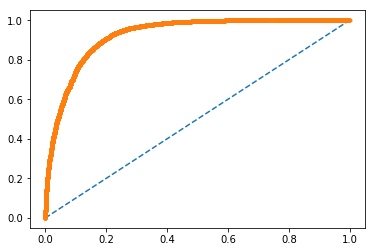

In [28]:
# Random forest model using select k best , 
from sklearn import ensemble
rfc = ensemble.RandomForestClassifier(n_estimators=200, max_features= 7, max_depth=8)

y = census['lowerpov']


from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(features, y ,test_size=0.2, random_state=100)
print('With 20% Holdout: ' + str(rfc.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(rfc.fit(features, y).score(features, y)))


# Cross validating using 10 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(rfc, features, y, cv=10))


from sklearn.metrics import classification_report
print('Random Forest report :')
print(classification_report(y_test, rfc.predict(X_test)))


#AUC 
probs = rfc.predict_proba(X_test)
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)



import matplotlib.pyplot as plt
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs, pos_label= 1 )
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

# show the plot
plt.show()



## 2. K - nearest neighbor

In [33]:
# Model 2: KNN gridsearch
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV 

# Initialize the model
knn = KNeighborsClassifier()

# Set parameters for KNN
# List of values to try 
knn_params = [{'n_neighbors': [2,3,5,7,10,15,25]}]

#GridSearchCV(estimator, param_grid, scoring=None, fit_params=None, 
    #n_jobs=None, iid=’warn’, refit=True, cv=’warn’, verbose=0, pre_dispatch=‘2*n_jobs’,
    #error_score=’raise-deprecating’, return_train_score=’warn’)

# Search for the best paramters. 
knn_grid = GridSearchCV(knn, knn_params, cv=5, verbose=1, n_jobs=-1)

# Fit the grid and obtain results
knn_grid.fit(features, y)

# Return best parameters and best score
print(knn_grid.best_params_)
print(knn_grid.best_score_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:  5.3min finished


{'n_neighbors': 25}
0.8339973350202565


With 20% Holdout: 0.8341465056024765
Testing on Sample: 0.8441727122225662
[0.82234186 0.82981157 0.81581427 0.83829071 0.85200888 0.83552056
 0.83383808 0.83107881 0.84541355 0.83868363]
KNN report :
              precision    recall  f1-score   support

           0       0.90      0.82      0.86     17201
           1       0.78      0.87      0.82     12518

   micro avg       0.84      0.84      0.84     29719
   macro avg       0.84      0.85      0.84     29719
weighted avg       0.85      0.84      0.84     29719

AUC: 0.923


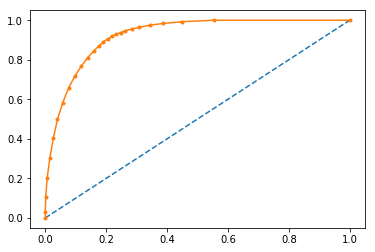

In [34]:
# Nearest neighbors model 
knn = KNeighborsClassifier(n_neighbors=25)

knn.fit(features,y)

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(features,y, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(knn.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(knn.fit(features, y).score(features, y)))

# Cross validating using 10 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(knn, features, y, cv=10))

from sklearn.metrics import classification_report
print('KNN report :')
print(classification_report(y_test, knn.predict(X_test)))

#AUC 
probs = knn.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs, pos_label= 1 )
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


## 3. Logistic Regression

In [35]:
# Logistic Regression Gridsearch cv 
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = (.00001,0.0001,0.001, 0.01, 0.1, 1, 10, 100)

# Create hyperparameter options
parameters = dict(C=C, penalty=penalty)

# Use GS-CV to see which alpha level is best.

logr_grid = GridSearchCV(logr, parameters, cv=5, verbose=1)

#Fit the logistic regression 
logr_grid.fit(features, y)

#return best parameters and best score

print(logr_grid.best_params_)
print(logr_grid.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solv

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework

{'C': 0.1, 'penalty': 'l1'}
0.8095481647980403


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


With 20% Holdout: 0.8078333725899256


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Testing on Sample: 0.8097971654306365


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework

[0.79979812 0.80504711 0.78768506 0.81776581 0.82468538 0.81035063
 0.81512888 0.81109092 0.81775355 0.80557238]
Logistic regression report :
              precision    recall  f1-score   support

           0       0.84      0.82      0.83     17201
           1       0.76      0.79      0.77     12518

   micro avg       0.81      0.81      0.81     29719
   macro avg       0.80      0.80      0.80     29719
weighted avg       0.81      0.81      0.81     29719

AUC: 0.896


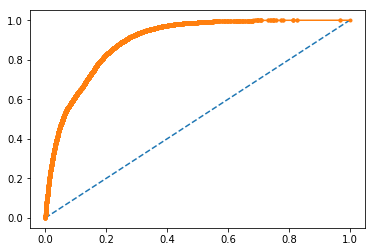

In [21]:
# Logistic regression model 
logr = LogisticRegression(C= .1, penalty='l1')


logr.fit(features,y)

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(logr.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(logr.fit(features, y).score(features, y)))

# Cross validating using 10 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(logr, features, y, cv=10))

from sklearn.metrics import classification_report
print('Logistic regression report :')
print(classification_report(y_test, logr.predict(X_test)))

#AUC 
probs = logr.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs, pos_label= 1 )
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## 4.SVM Classifyer 

In [37]:
# SVM gridsearch for best parameters 
from sklearn.svm import SVC

svm = SVC()

# new parameters for this model
svc_params = [{'C': [.000001,.00001,.001,.01,.1], 'gamma': [.0001,.001,.01,.1]}]

# setting up the grid
svc_grid = GridSearchCV(svm, svc_params, cv=4, verbose=1, n_jobs=-1)

#Fit the grid
svc_grid.fit(features,y)

#return best parameters and best score

print(svc_grid.best_params_)
print(svc_grid.best_score_)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KeyboardInterrupt: 

In [23]:
# SVM model using features 
from sklearn.svm import SVC
svm = SVC(C=.01, gamma=.01)


# AttributeError: predict_proba is not available when  probability=False -> ERROR FOR SVM AUC 


svm.fit(features,y)

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(features,y, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(svm.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(svm.fit(features, y).score(features, y)))

# Cross validating using 10 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(svm, features,y, cv=5))

from sklearn.metrics import classification_report
print('SVM report :')
print(classification_report(y_test, svm.predict(X_test)))



With 20% Holdout: 0.7939365389144991
Testing on Sample: 0.807354267332463
[0.78875467 0.79477775 0.80527609 0.79817625 0.80580793]
SVM report :
              precision    recall  f1-score   support

           0       0.86      0.80      0.83     17201
           1       0.75      0.82      0.78     12518

   micro avg       0.80      0.80      0.80     29719
   macro avg       0.80      0.81      0.80     29719
weighted avg       0.81      0.80      0.81     29719



## 5.Gradient Boosting

In [46]:
# Parameters to test in gridsearch cv 

params = {'n_estimators': [50, 100, 150, 200, 300, 500],
                           
          'max_depth': [4,5,6,7,8],
         }

# Initialize and fit the model.
gb = ensemble.GradientBoostingClassifier()

# Use the grid
gb_grid = GridSearchCV(gb, params, cv=3, verbose=1, n_jobs=-1)

# Fit the grid
gb_grid.fit(features, y)

# Return best parameters and best score
print(gb_grid.best_params_)
print(gb_grid.best_score_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 61.2min finished


{'max_depth': 6, 'n_estimators': 100}
0.8433180343755468


With 20% Holdout: 0.8419866078939399
Testing on Sample: 0.8494757527221826
[0.83674293 0.84313594 0.82267833 0.84831763 0.86217107 0.84817282
 0.84238509 0.84595195 0.86122888 0.84985531]
Gradient Boosting report :
              precision    recall  f1-score   support

           0       0.90      0.83      0.86     17201
           1       0.79      0.88      0.83     12518

   micro avg       0.85      0.85      0.85     29719
   macro avg       0.85      0.85      0.85     29719
weighted avg       0.85      0.85      0.85     29719

AUC: 0.928


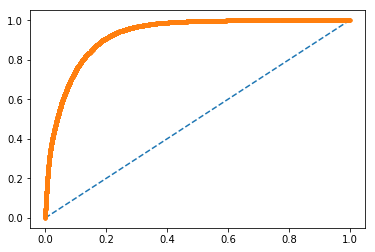

In [47]:
# Gradient boosting model 
# Best Parameters from gridsearchcv 
params = {'n_estimators': 100,
          'max_depth': 6,
          'loss': 'deviance'}

# Initialize and fit the model.
gb = ensemble.GradientBoostingClassifier(**params)

gb.fit(features,y)

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(features,y, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(gb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(gb.fit(features, y).score(features, y)))

# Cross validating using 10 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(gb, pca_X, y, cv=10))

from sklearn.metrics import classification_report
print('Gradient Boosting report :')
print(classification_report(y_test, gb.predict(X_test)))

#AUC 
probs = gb.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs, pos_label= 1 )
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


## Decision Tree

In [39]:
# Decision Tree Gridsearch 
from sklearn.tree import DecisionTreeClassifier


# Initialize the model
decision_tree = DecisionTreeClassifier()

# Set parameters for dtc
params = [{'max_features': [2, 4, 6, 8],
             'max_depth': [2, 4, 6, 8]}]

# Search for the best paramters. 
decision_tree_grid = GridSearchCV(decision_tree, params, cv=5, verbose=1, n_jobs=-1)

# Fit the grid and obtain results
decision_tree_grid.fit(features, y)

# Return best parameters and best score
print(decision_tree_grid.best_params_)
print(decision_tree_grid.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   11.9s finished


{'max_depth': 8, 'max_features': 8}
0.8398791337469884


With 20% Holdout: 0.8408762071402134
Testing on Sample: 0.8404578919741039
[0.82940781 0.83061911 0.81769852 0.84414536 0.85577764 0.83888552
 0.83552056 0.83457837 0.84951881 0.84514436]
Decision Tree report :
              precision    recall  f1-score   support

           0       0.88      0.84      0.86     17201
           1       0.79      0.84      0.82     12518

   micro avg       0.84      0.84      0.84     29719
   macro avg       0.84      0.84      0.84     29719
weighted avg       0.84      0.84      0.84     29719

AUC: 0.919


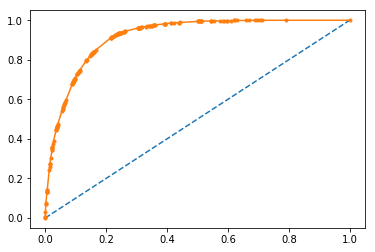

In [40]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

decision_tree = DecisionTreeClassifier( 
    criterion='entropy',
    max_features=8,
    max_depth=8)


from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(features,y, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(decision_tree.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(decision_tree.fit(features, y).score(features, y)))


# Cross validating using 10 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(decision_tree, features, y, cv=10))


from sklearn.metrics import classification_report
print('Decision Tree report :')
print(classification_report(y_test, decision_tree.predict(X_test)))

#AUC 
probs = decision_tree.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs, pos_label= 1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

With 20% Holdout: 0.6164743093643796
Testing on Sample: 0.6193924384564653
[0.62395693 0.619179   0.62725437 0.61776581 0.61525002 0.61565381
 0.62090316 0.61235615 0.62406622 0.61753819]
Native Bayes Classification report :
              precision    recall  f1-score   support

           0       0.61      0.94      0.74     17201
           1       0.68      0.17      0.27     12518

   micro avg       0.62      0.62      0.62     29719
   macro avg       0.65      0.56      0.50     29719
weighted avg       0.64      0.62      0.54     29719

AUC: 0.555


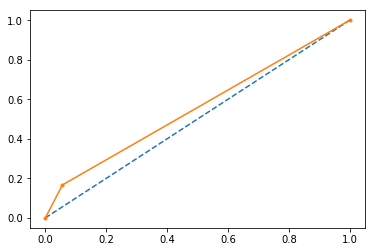

In [41]:
# Native Bayes 

from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split


# Instantiate our model and Fit our model to the data.
bnb = BernoulliNB()
bnb.fit(features, y)

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(features,y, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(features, y).score(features, y)))

# Cross validating using 10 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(bnb,features, y, cv=10))

#Classification report 
from sklearn.metrics import classification_report
print('Native Bayes Classification report :')
print(classification_report(y_test, bnb.predict(X_test)))

#AUC 
probs = bnb.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs, pos_label= 1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


# Models Using PCA

In [13]:
# PCA 

# PCA for 10 components 
from sklearn.decomposition import PCA

y = census['lowerpov']
X = census.drop(['lowerpov'],1)

# Use PCA to create new columns 
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(X)
pca_X = pd.DataFrame(data = principalComponents, 
                     columns = ['principal component 1', 'principal component 2', 'principal component 3', 
                                'principal component 4','principal component 5','principal component 6', 
                               'principal component 7', 'principal component 8','principal component 9','principal component 10'])



## 1) Random Forest

In [29]:
# Model 3: Random Forest gridsearchcv, took 300 min 
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
rfc = ensemble.RandomForestClassifier()

param_grid = { 
    'n_estimators': [15, 200, 500, 750],
    'max_features': [2,4,6,7],
    'max_depth': [5,6,7,8]
}


grid = GridSearchCV(rfc, param_grid, cv=3, verbose=3, n_jobs=-1)

grid.fit(pca_X,y)

# Show the best parameter and best score 
print(grid.best_params_)
print( grid.best_score_)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 124.7min
[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed: 218.7min finished


{'max_depth': 8, 'max_features': 6, 'n_estimators': 750}
0.8403300267843924


With 20% Holdout: 0.8372758168175242
Testing on Sample: 0.8405722976701616
[0.82496046 0.82607086 0.84467849 0.83387732 0.84147655]
Random Forest report :
              precision    recall  f1-score   support

           0       0.89      0.83      0.86     17154
           1       0.79      0.87      0.82     12565

   micro avg       0.84      0.84      0.84     29719
   macro avg       0.84      0.85      0.84     29719
weighted avg       0.85      0.84      0.84     29719

AUC: 0.923


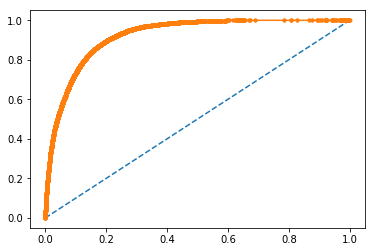

In [14]:
#Gridsearch results for PCA 
#{'max_depth': 8, 'max_features': 6, 'n_estimators': 750}
#0.8403300267843924


# Random forest model using PCA

from sklearn import ensemble
rfc = ensemble.RandomForestClassifier(n_estimators=750, max_features= 6, max_depth=8)

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(pca_X, y ,test_size=0.2, random_state=100)
print('With 20% Holdout: ' + str(rfc.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(rfc.fit(pca_X, y).score(pca_X, y)))


# Cross validating using 10 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(rfc, pca_X, y, cv=5))


from sklearn.metrics import classification_report
print('Random Forest report :')
print(classification_report(y_test, rfc.predict(X_test)))


#AUC 
probs = rfc.predict_proba(X_test)
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)


import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs, pos_label= 1 )
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

# show the plot
plt.show()

In [ ]:
#AUC 
probs = rfc.predict_proba(X_test)
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)


import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs, pos_label= 1 )
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

# show the plot
plt.show()

## 2) K-Nearest Neighbor 


In [31]:
# Model 2: KNN gridsearch
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV 

# Initialize the model
knn = KNeighborsClassifier()

# Set parameters for KNN
# List of values to try 
knn_params = [{'n_neighbors': [2,3,5,7,10,15,25]}]

#GridSearchCV(estimator, param_grid, scoring=None, fit_params=None, 
    #n_jobs=None, iid=’warn’, refit=True, cv=’warn’, verbose=0, pre_dispatch=‘2*n_jobs’,
    #error_score=’raise-deprecating’, return_train_score=’warn’)

# Search for the best paramters. 
knn_grid = GridSearchCV(knn, knn_params, cv=7, verbose=1, n_jobs=-1)

# Fit the grid and obtain results
knn_grid.fit(pca_X, y)

# Return best parameters and best score
print(knn_grid.best_params_)
print(knn_grid.best_score_)

Fitting 7 folds for each of 7 candidates, totalling 49 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:  7.3min finished


{'n_neighbors': 25}
0.8158673970685223


With 20% Holdout: 0.816312796527474
Testing on Sample: 0.8315948154030446
[0.8039031  0.81144011 0.79421265 0.81971736 0.83720304 0.81627297
 0.81586917 0.81728246 0.83080961 0.8221953 ]
KNN report :
              precision    recall  f1-score   support

           0       0.90      0.80      0.85     17201
           1       0.76      0.88      0.81     12518

   micro avg       0.83      0.83      0.83     29719
   macro avg       0.83      0.84      0.83     29719
weighted avg       0.84      0.83      0.83     29719

AUC: 0.911


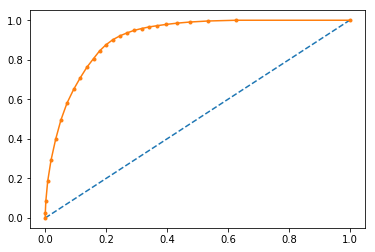

In [32]:
# Nearest neighbors model 
knn = KNeighborsClassifier(n_neighbors=25)

knn.fit(pca_X,y)

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(pca_X,y, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(knn.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(knn.fit(pca_X, y).score(pca_X, y)))

# Cross validating using 10 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(knn, pca_X, y, cv=10))

from sklearn.metrics import classification_report
print('KNN report :')
print(classification_report(y_test, knn.predict(X_test)))

#AUC 
probs = knn.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs, pos_label= 1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## 3) Logistic Regression


In [18]:
# Logistic Regression Gridsearch cv 
from sklearn.model_selection import GridSearchCV 

from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = (0.001, 0.01, 0.1, 1)

# Create hyperparameter options
parameters = dict(C=C, penalty=penalty)

# Use GS-CV to see which alpha level is best.

logr_grid = GridSearchCV(logr, parameters, cv=4, verbose=1)

#Fit the logistic regression 
logr_grid.fit(pca_X, y)

#return best parameters and best score

print(logr_grid.best_params_)
print(logr_grid.best_score_)

Fitting 4 folds for each of 8 candidates, totalling 32 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solv

{'C': 0.001, 'penalty': 'l1'}
0.8111969527706367


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


With 20% Holdout: 0.8089774218513409


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Testing on Sample: 0.810739329986406


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework

[0.80460312 0.80416569 0.81779333 0.814092   0.81506158]
Logistic regression report :
              precision    recall  f1-score   support

           0       0.85      0.82      0.83     17201
           1       0.76      0.80      0.78     12518

   micro avg       0.81      0.81      0.81     29719
   macro avg       0.80      0.81      0.80     29719
weighted avg       0.81      0.81      0.81     29719

AUC: 0.892


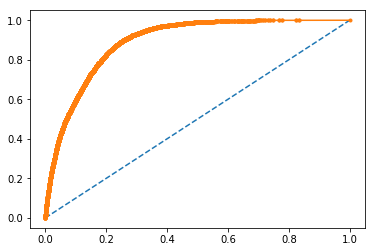

In [19]:
# Logistic regression model 
logr = LogisticRegression(C= .001, penalty='l1')


logr.fit(pca_X,y)

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(logr.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(logr.fit(pca_X, y).score(pca_X, y)))

# Cross validating using 10 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(logr, pca_X, y, cv=5))

from sklearn.metrics import classification_report
print('Logistic regression report :')
print(classification_report(y_test, logr.predict(X_test)))

#AUC 
probs = logr.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs, pos_label= 1 )
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## 4) Native Bayes

With 20% Holdout: 0.7659073320098254
Testing on Sample: 0.7677564370028399
[0.7666218  0.77557201 0.74602961 0.76554509 0.77367252 0.7660677
 0.77919106 0.76169325 0.76108756 0.77791238]
Native Bayes Classification report :
              precision    recall  f1-score   support

           0       0.85      0.72      0.78     17201
           1       0.68      0.83      0.75     12518

   micro avg       0.77      0.77      0.77     29719
   macro avg       0.77      0.77      0.76     29719
weighted avg       0.78      0.77      0.77     29719

AUC: 0.850


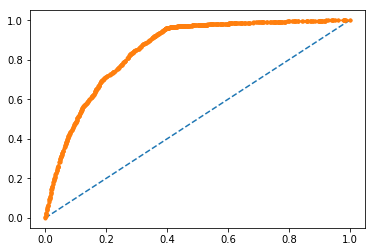

In [48]:
# Native Bayes 

from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split


# Instantiate our model and Fit our model to the data.
bnb = BernoulliNB()
bnb.fit(pca_X, y)

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(pca_X,y, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(pca_X, y).score(pca_X, y)))

# Cross validating using 10 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(bnb,pca_X , y, cv=10))

#Classification report 
from sklearn.metrics import classification_report
print('Native Bayes Classification report :')
print(classification_report(y_test, bnb.predict(X_test)))

#AUC 
probs = bnb.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs, pos_label= 1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


In [50]:
# Decision Tree Gridsearch 
from sklearn.tree import DecisionTreeClassifier


# Initialize the model
decision_tree = DecisionTreeClassifier()

# Set parameters for dtc
params = [{'max_features': [2, 4, 6, 8],
             'max_depth': [2, 4, 6, 8]}]

# Search for the best paramters. 
decision_tree_grid = GridSearchCV(decision_tree, params, cv=5, verbose=1, n_jobs=-1)

# Fit the grid and obtain results
decision_tree_grid.fit(pca_X, y)

# Return best parameters and best score
print(decision_tree_grid.best_params_)
print(decision_tree_grid.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   17.9s finished


{'max_depth': 8, 'max_features': 8}
0.8292528635072749


## 5) Decision Tree


With 20% Holdout: 0.8327669167872405
Testing on Sample: 0.8352221489427568
[0.81884253 0.82133244 0.80316285 0.83492598 0.84696144 0.83377078
 0.82508917 0.82656976 0.83659735 0.83471297]
Decision Tree report :
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     17201
           1       0.80      0.81      0.81     12518

   micro avg       0.84      0.84      0.84     29719
   macro avg       0.83      0.83      0.83     29719
weighted avg       0.84      0.84      0.84     29719

AUC: 0.917


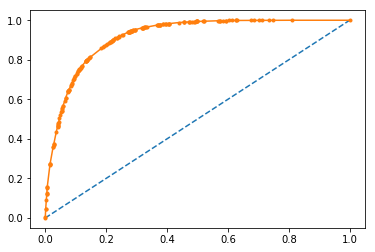

In [51]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

decision_tree = DecisionTreeClassifier( 
    criterion='entropy',
    max_features=8,
    max_depth=8)


from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(pca_X,y, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(decision_tree.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(decision_tree.fit(pca_X, y).score(pca_X, y)))


# Cross validating using 10 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(decision_tree, pca_X, y, cv=10))


from sklearn.metrics import classification_report
print('Decision Tree report :')
print(classification_report(y_test, decision_tree.predict(X_test)))

#AUC 
probs = decision_tree.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs, pos_label= 1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## 6) Gradient Boosted Model 

In [52]:
# Parameters to test in gridsearch cv 

params = {'n_estimators': [50, 100, 150, 200, 300, 500],
                           
          'max_depth': [4,5,6,7,8],
         }

# Initialize and fit the model.
gb = ensemble.GradientBoostingClassifier()

# Use the grid
gb_grid = GridSearchCV(gb, params, cv=3, verbose=1, n_jobs=-1)

# Fit the grid
gb_grid.fit(pca_X, y)

# Return best parameters and best score
print(gb_grid.best_params_)
print(gb_grid.best_score_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 34.7min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 129.7min finished


{'max_depth': 7, 'n_estimators': 50}
0.8448389571584317


With 20% Holdout: 0.8448130825397894
Testing on Sample: 0.8595636432157422
[0.83627187 0.84212651 0.82106326 0.84905787 0.86183458 0.84837472
 0.84245239 0.84393297 0.8595464  0.84797093]
Gradient Boosting report :
              precision    recall  f1-score   support

           0       0.90      0.85      0.88     17201
           1       0.81      0.87      0.84     12518

   micro avg       0.86      0.86      0.86     29719
   macro avg       0.86      0.86      0.86     29719
weighted avg       0.86      0.86      0.86     29719

AUC: 0.936


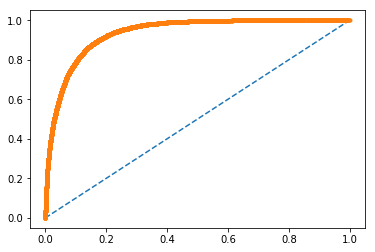

In [53]:
# Gradient boosting model 
# Best Parameters from gridsearchcv 
params = {'n_estimators': 50,
          'max_depth': 7,
          'loss': 'deviance'}

# Initialize and fit the model.
gb = ensemble.GradientBoostingClassifier(**params)

gb.fit(pca_X,y)


# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(pca_X,y, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(gb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(gb.fit(pca_X, y).score(pca_X, y)))

# Cross validating using 10 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(gb, pca_X, y, cv=10))

from sklearn.metrics import classification_report
print('Gradient Boosting report :')
print(classification_report(y_test, gb.predict(X_test)))

#AUC 
probs = gb.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs, pos_label= 1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


## 7) SVM


In [ ]:
# SVM gridsearch for best parameters 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm = SVC()

# new parameters for this model
svc_params = [{'C': [.01,.1,1], 'gamma': [.01,.1,1]}]

# setting up the grid
svc_grid = GridSearchCV(svm, svc_params, cv=3, verbose=1, n_jobs=-1)

#Fit the grid
svc_grid.fit(pca_X,y)

#return best parameters and best score

print(svc_grid.best_params_)
print(svc_grid.best_score_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [22]:
# SVM model using pca 
from sklearn.svm import SVC
svm = SVC(C=0.01, gamma=.01)

svm.fit(pca_X,y)

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(svm.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(svm.fit(pca_X, y).score(pca_X, y)))

# Cross validating using 10 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(svm, pca_X, y, cv=3))

from sklearn.metrics import classification_report
print('SVM report :')
print(classification_report(y_test, svm.predict(X_test)))



With 20% Holdout: 0.6403647498233453
Testing on Sample: 0.6528123611989717
[0.62341517 0.63128142 0.63027195]
SVM report :
              precision    recall  f1-score   support

           0       0.64      0.93      0.75     17201
           1       0.73      0.27      0.40     12518

   micro avg       0.65      0.65      0.65     29719
   macro avg       0.68      0.60      0.58     29719
weighted avg       0.68      0.65      0.60     29719



## Conclusion 


Visualization suggested several features were prone to suggetive to our target varible, those between a poverty threshold of  100 and 200 were much more likely to use foodstamps. Using select k best, the varible that were most impactful included: 'METRO', 'FOODSTMP', 'SEX', 'AGE', 'RACBLK', 'RACWHT', 'HCOVANY','HCOVPRIV', 'HCOVPUB', 'EDUC', 'EDUCD', 'income_vs_rent'(our feature). It is interesting to see that metro, or wheter or not you are located in or outside of a metropolitan area and principal city, is the most prominent variable. The visualization of this varibale shows that  living outside of a metropolitan area and principal city is particular to those with lower poverty thresholds, while those with higher poverty thresholds concentrate in metro areas and cities. 


After visualizing the data, We tested several modeling technique using two different feature selection methods, specifically select k best and PCA. Both performed similarly yet in certain model types, there were stark differences in performance. Specifically among Native Bayes and SVM. Native bayes using select k best preformed the worst among all of the models, but preformed moderatly well using PCA. SVM using pca was the second worst performing model, but performed moderatly well using select k best. 


To evaluate each of the models, I used a clasification report giving scores in precision, recall, and f1 - scores. Additionally, I used AUC or area under the curve. It is used in classification analysis in order to determine which of the used models predicts the classes best.  Here, the true positive rates are plotted against false positive rates. An example is below. The closer AUC for a model comes to 1, the better it is, and the closer the AUC is to .5 is it nearly random. Among all of the models, using both PCA and select k best, the best performing model was the gradient boosted classifier using PCA. Both model maintains a simlar score in the classification of our non target class, but the model using PCA had a greater precision score in the classification of our target class. Thus giving the PCA model an overall AUC of .936 higher f1 score. 





       